##Importando librerías


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Importando dataset

In [2]:
from google.colab import files 
datos = files.upload()

Saving k-means-psicologia.csv to k-means-psicologia.csv


In [3]:
import io
df_psico = pd.read_csv(io.BytesIO(datos['k-means-psicologia.csv']))
df_psico.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


* Usuario (el nombre en Twitter)
* "op" = Openness to experience - grado de apertura mental a nuevas experiencias, curiosidad, arte.
* "co" = Conscientiousness - Grado de orden, prolijidad, organización.
* "ex" = Extraversion - Grado timidez, solitario o participación ante el grupo social.
* "ag" = Agreeableness - Grado de empatía con los demás, temperamento.
* "ne" = Neuroticism - Grado de neurocitismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount - Cantidad promedio de palabras usadas en sus tweets
* Categoría - Actividad laboral del usuario




##Conociendo los datos

In [36]:
df_psico.describe()
df_psico.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

##Graficando

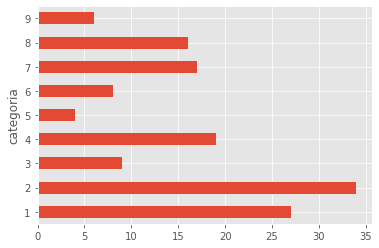

In [37]:
df_psico.groupby('categoria').size().plot.barh()

1.   Actor/Actriz
2.   Cantante
3.   Modelo
4.   Tv, series
5.   Radio
6.   Tecnología
7.   Deportes
8.   Política
9.   Escritor

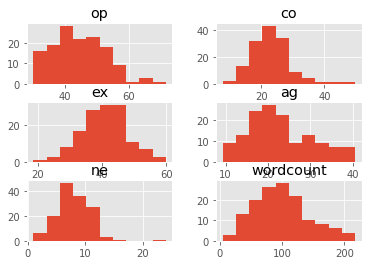

In [38]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


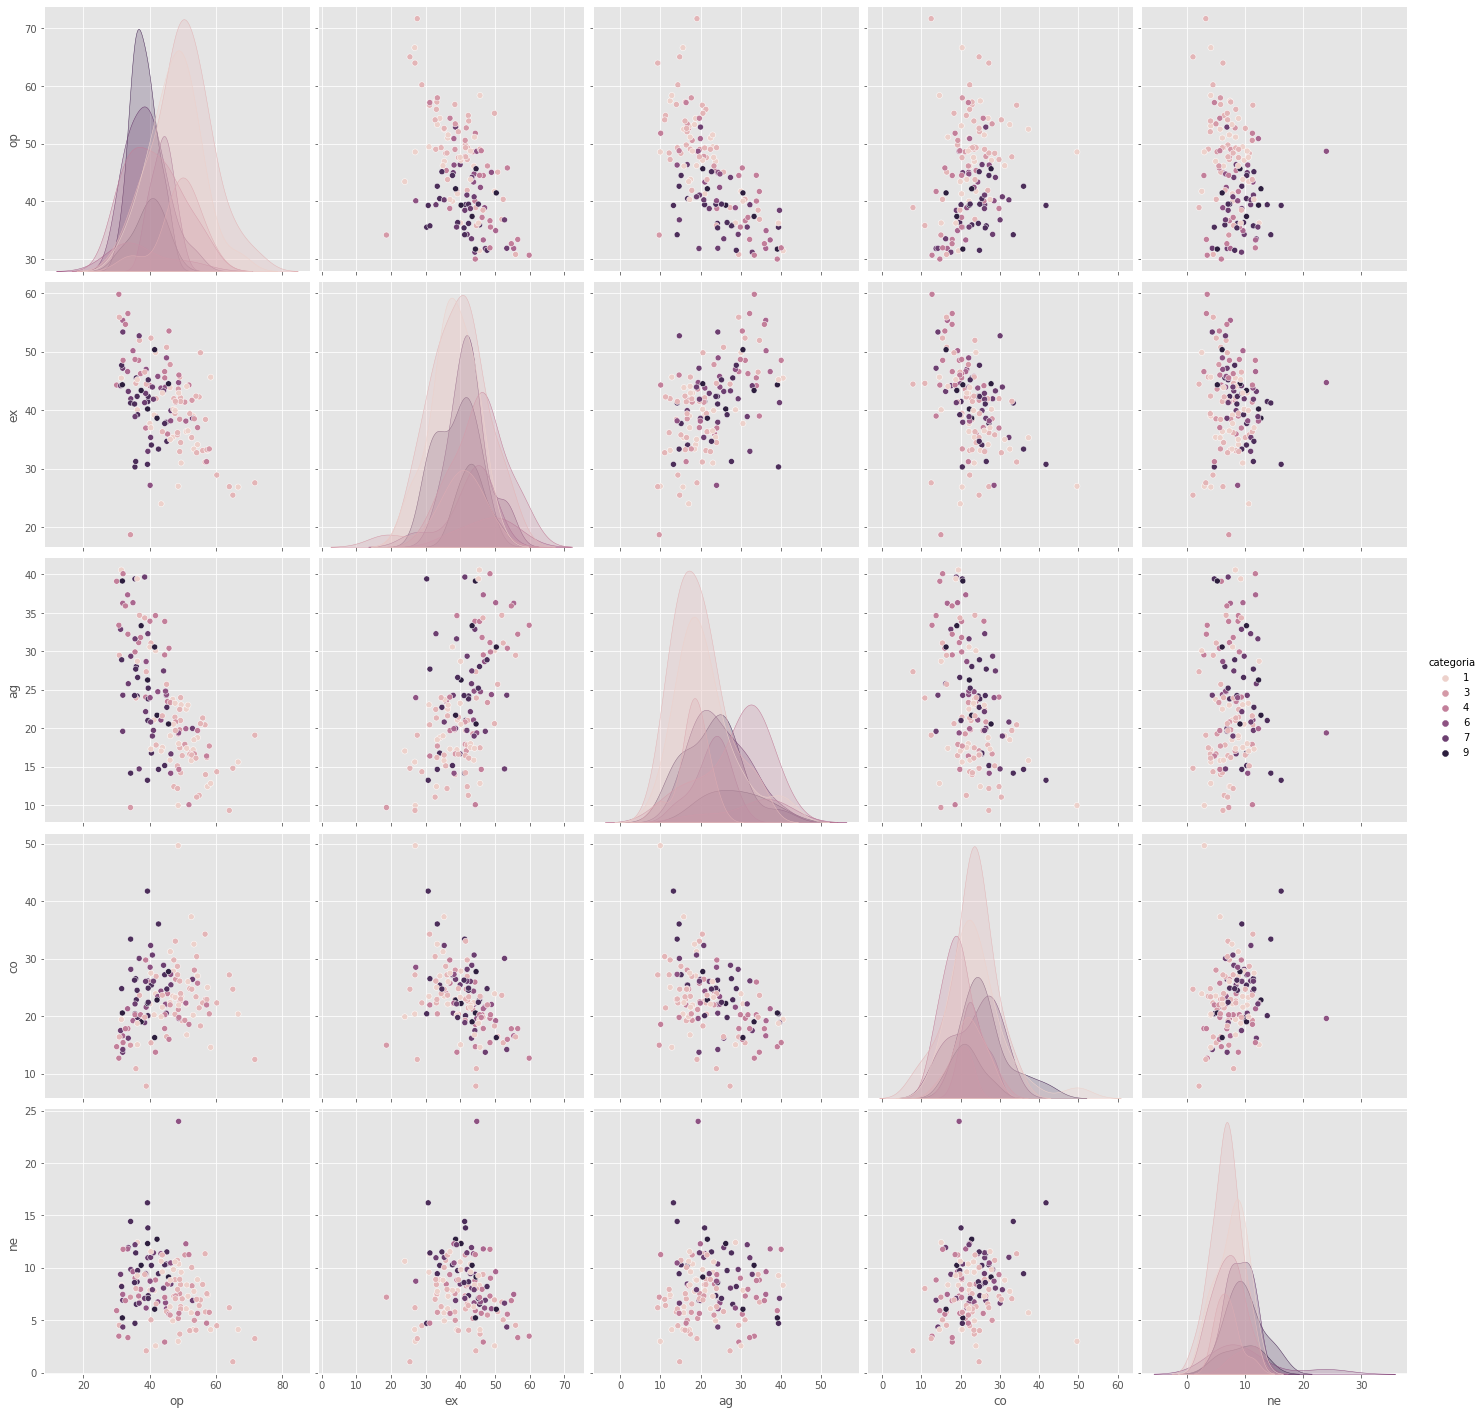

In [39]:
#graficos de relaciones en pares en el dataset.
#hue= variación de colores dependiendo del valor de la variable
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","ex","ag","co","ne"],kind='scatter')
#Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías. 

##Separamos datos (X y Y)
Aca no trabajaremos con **train** y **test** pues no es un algoritmo de aprendizaje supervisado

In [40]:
X = np.array(df_psico[["op","ex","ag","co","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

##Graficamos los valores de X en un grafico 3D

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

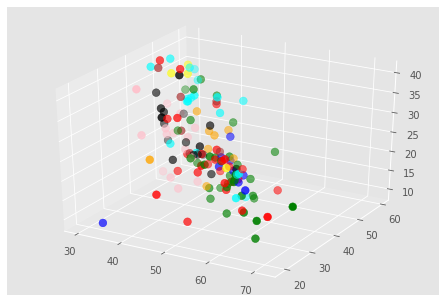

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

##Encontramos el total de clousters (agrupamientos) idoneo
usaremos el método de codo

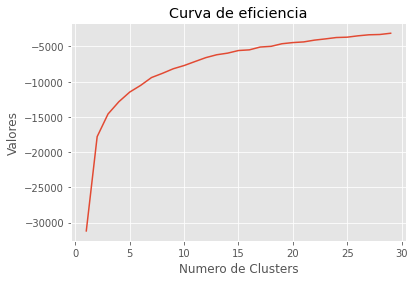

In [42]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

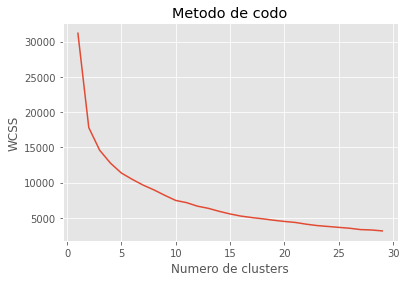

In [43]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##Conocer los centroides

In [56]:
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[61.93625244 29.62719367 15.08910133 21.92653989  4.93914989]
 [43.11179477 48.28114769 27.87896869 19.96900615  5.64101308]
 [31.8976166  56.4671822  33.456343   16.2722344   5.1324852 ]
 [51.00915064 35.65128609 18.63330677 27.76641314  7.81589395]
 [35.56395467 44.57158279 33.84055925 20.123424    8.89022658]
 [38.085463   27.385914   25.01579983 22.74289083  8.9376725 ]
 [51.28134555 42.34686336 16.77116995 21.07473109  7.08354482]
 [34.4115396  46.5647776  24.1907532  12.5739472   6.6560064 ]
 [42.1171819  40.53205339 20.7464659  25.62267358 10.31905958]
 [43.515365   30.358012   12.60759133 42.46817433  9.538579  ]]


##Visualizar grupos y centroides

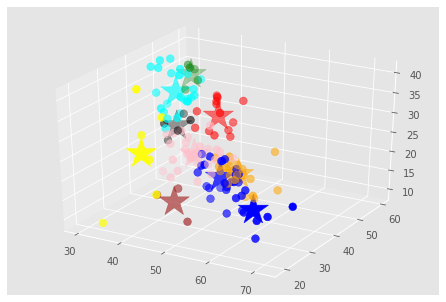

In [57]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown'] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

## Mostramos grupos según Openess y Extraversion

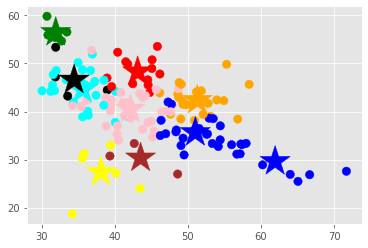

In [58]:
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

## Mostramos grupos según Openess y Agreeableness

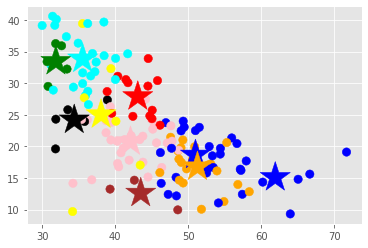

In [59]:
f1 = df_psico['op'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

## Mostramos grupos según Extraversion y Agreeableness

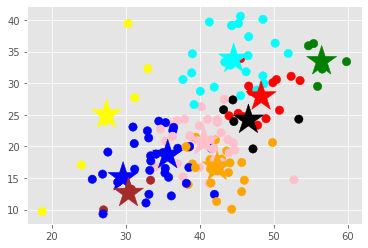

In [60]:
f1 = df_psico['ex'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

## Mostramos grupos según Conscientiousness y Neuroticism 

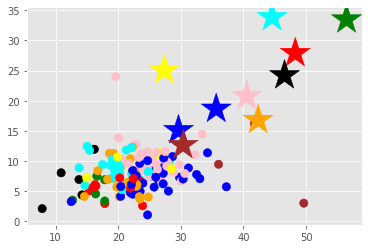

In [61]:
f1 = df_psico['co'].values
f2 = df_psico['ne'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

##Ver resultados en tablas

In [62]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,9
1,red,13
2,green,5
3,blue,22
4,cyan,24
5,yellow,6
6,orange,22
7,black,5
8,pink,31
9,brown,3


In [63]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,2.0
2,2,5.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


##Usuarios con rasgos de personalidad similares

In [64]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,3gerardpique,4
1,aguerosergiokun,8
2,albertochicote,4
3,AlejandroSanz,1
4,alfredocasero1,4


In [71]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
0,3gerardpique,4
2,albertochicote,4
4,alfredocasero1,4
16,Berto_Romero,4
19,Buenafuente,4
20,CarlosAuryn,4
23,CasillasWorld,4
26,CFKArgentina,4
27,charliesheen,4
35,DaniMateoAgain,4


###Usuarios más relevantes en cada clouster

In [74]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

foofighters
ChristianG_7
jordiGlez
aplusk
perezreverte
stevewoz
britneyspears
pabloalboran
paugasol
jiminhofe


In [75]:
X_new = np.array([[34.29,	28.148819,	41.948819,	29.370315,	9.841575]]) #GerardPiqué
 
new_labels = kmeans.predict(X_new)
print(new_labels)


[5]
